<a href="https://colab.research.google.com/github/ucfilho/raianars_june_2020/blob/master/Figure_05_paper_PCA_functions_from_zip_jun_21_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from matplotlib import pyplot as PLT
plt.style.use('seaborn-whitegrid')
from pylab import *
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

# TRAIN DATASET
!git clone https://github.com/RaianaSeixas/ANN #clonar do Github
%cd ANN
#!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN
Hello world
I'm evolving!!!



In [2]:
Transfere='imput_ANN_D10_30_out_07_19.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [3]:
labels=[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

In [4]:
# 2019-10-07_12h50min_DE_Rosenbrock_30.xlsx

In [5]:
i=0
for name in labels:
  print('i=',i,name)
  i=i+1

i= 0 2019-10-05_02h51min_DE_Rosenbrock_10.csv
i= 1 2019-10-05_02h58min_DE_Sphere_10.csv
i= 2 2019-10-05_03h13min_DE_Rastrigin_10.csv
i= 3 2019-10-05_03h20min_DE_Schwefel_10.csv
i= 4 2019-10-05_03h27min_DE_Sum_of_different_powers_10.csv
i= 5 2019-10-05_03h36min_DE_Ackley_10.csv
i= 6 2019-10-05_03h42min_DE_Michalewicz_10.csv
i= 7 2019-10-07_12h50min_DE_Rosenbrock_30.csv
i= 8 2019-10-07_13h05min_DE_Sphere_30.csv
i= 9 2019-10-07_13h40min_DE_Schwefel_30.csv
i= 10 2019-10-07_14h17min_DE_Rastrigin_30.csv
i= 11 2019-10-07_14h35min_DE_Sum_of_different_powers_30.csv
i= 12 2019-10-07_14h53min_DE_Ackley_30.csv
i= 13 2019-10-07_15h14min_DE_Michalewicz_30.csv


In [6]:
file_selected=labels[11] # just to test...
print(file_selected)

2019-10-07_14h35min_DE_Sum_of_different_powers_30.csv


In [7]:
df=pd.read_csv(file_selected)

In [8]:
#print(df)

In [9]:
col_names=df.columns
print(col_names)

Index(['Unnamed: 0', 'DIVERSIDADE (DI)', 'DI RELATIVO', 'FRAC Its',
       'VELOC FOBJ', 'VELOC X', 'NP', 'Fo', 'CRo', 'fmin', 'fmax', 'AD_fmin',
       'AD_fmax', 'DELTA FOBJ', 'DELTA VX', 'r_fitness', 'F', 'CR',
       'FUNCTION'],
      dtype='object')


In [10]:
fields=['DI RELATIVO', 'FRAC Its','Fo', 'CRo', 'F', 'CR']

In [11]:
Y_CR=np.array(df['F'])
Y_F=np.array(df['CR'])
Num=len(Y_F)
X_F=np.zeros(Num)
for i in range(Num):
  X_F[i]=(i)/Num

In [12]:
file_selected=labels[0]
df=pd.read_csv(file_selected)
Parallel_Coord=df[fields]
print(Parallel_Coord)

   DI RELATIVO  FRAC Its        Fo       CRo         F        CR
0     1.081077       0.2  0.798558  0.531855  0.618503  0.966139
1     1.091500       0.3  0.618503  0.966139  0.627984  0.944441
2     1.107599       0.4  0.627984  0.944441  0.894793  0.571047
3     1.144213       0.5  0.894793  0.571047  0.901544  0.852554
4     1.079718       0.6  0.901544  0.852554  0.607277  0.962316
5     1.069692       0.7  0.607277  0.962316  0.589871  0.737670
6     1.174030       0.8  0.589871  0.737670  0.744910  0.925582
7     1.135718       0.9  0.744910  0.925582  0.585148  0.982332
8     1.113284       1.0  0.585148  0.982332  0.556384  0.959422


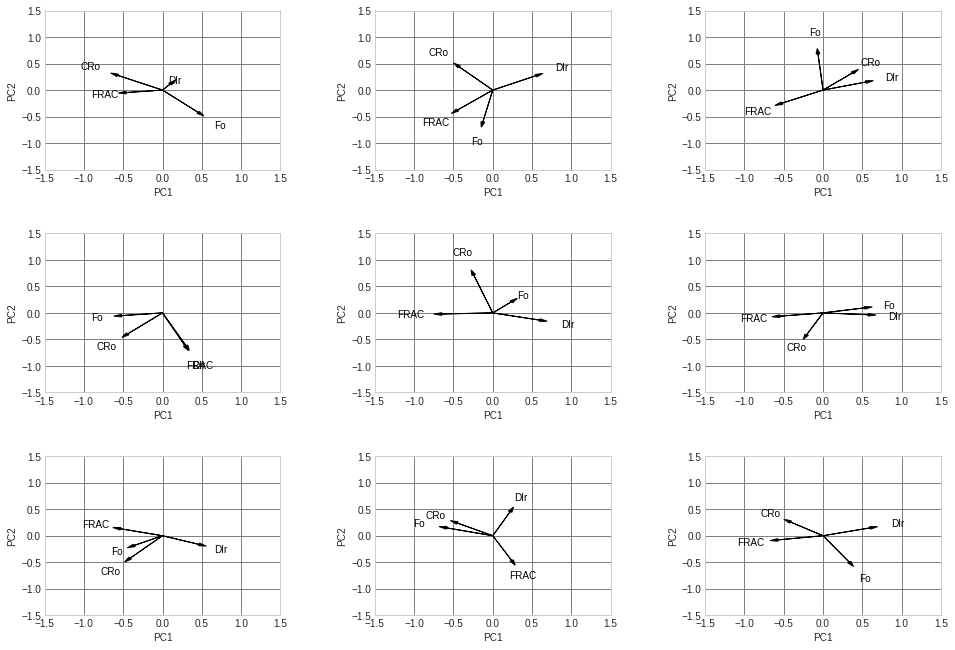

In [13]:
N=9
#Call the function. 
Name=fields 
Name=['DIr','FRAC','Fo','CRo']
Num=4

for i in range(N):
  file_selected=labels[i]
  df=pd.read_csv(file_selected)
  Parallel_Coord=df[fields]
  X=np.array(Parallel_Coord[fields])
  y=np.array(Parallel_Coord[['F']])
  #y=np.array(Parallel_Coord[['CR']])

  scaler = StandardScaler()
  scaler.fit(X)
  X=scaler.transform(X)

  pca = PCA()
  pca.fit(X,y)
  x_new = pca.transform(X)   



  coeff=np.transpose(pca.components_[0:2, :])
  plt.subplot(3,3,i+1)


  for i in range(Num):

    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'k',head_width=0.05,
              head_length=0.1, fc='k', ec='k')
    plt.text(coeff[i,0]* 1.6, coeff[i,1] * 1.6, Name[i], color = 'k', ha = 'center', va = 'center')

  plt.ylim(-1.5, 1.5)     # set the ylim to bottom, top
  plt.xlim(-1.5, 1.5)     # set the ylim to bottom, top
  plt.xlabel("PC{}".format(1))
  plt.ylabel("PC{}".format(2))
  plt.grid(True, linewidth=1,color='gray')

  '''
  file_selected=labels[i]
  df=pd.read_csv(file_selected)
  Y_CR=np.array(df['F'])
  Y_F=np.array(df['CR'])
  plt.xlim(0, 1.0)
  plt.ylim(0, 1.5)
  plt.plot(X_F, Y_F, 'ko--', X_F, Y_CR, 'k^-', linewidth=2, markersize=6)
  plt.legend( ('F', 'CR'), loc=[0.7,0.8], fontsize=10)
  plt.xlabel('Fraction intearations', fontsize=14, fontweight='bold')
  plt.ylabel('F and CR', fontsize=14, fontweight='bold')
  plt.grid(True, linewidth=1,color='gray')
  plt.tick_params(axis='both', which='major', labelsize=15)
  '''
plt.subplots_adjust(bottom=0.1, right=2.2, top=2.2,hspace=0.4, wspace=0.4)

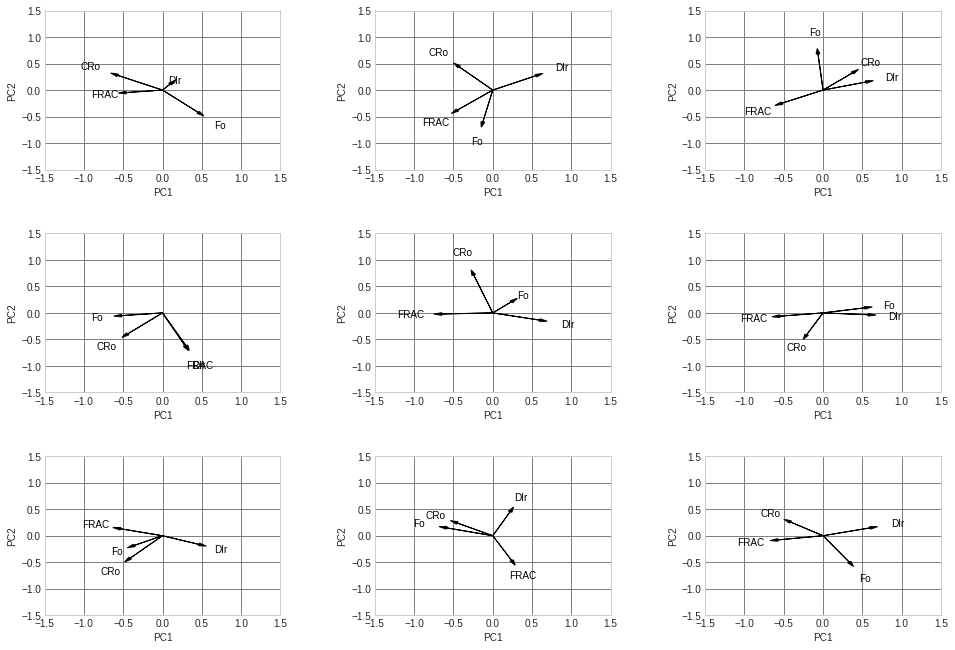

In [14]:
N=9
#Call the function. 
Name=fields 
Name=['DIr','FRAC','Fo','CRo']
Num=4

for i in range(N):
  file_selected=labels[i]
  df=pd.read_csv(file_selected)
  Parallel_Coord=df[fields]
  X=np.array(Parallel_Coord[fields])
  y=np.array(Parallel_Coord[['CR']])
  #y=np.array(Parallel_Coord[['CR']])

  scaler = StandardScaler()
  scaler.fit(X)
  X=scaler.transform(X)

  pca = PCA()
  pca.fit(X,y)
  x_new = pca.transform(X)   



  coeff=np.transpose(pca.components_[0:2, :])
  plt.subplot(3,3,i+1)


  for i in range(Num):

    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'k',head_width=0.05,
              head_length=0.1, fc='k', ec='k')
    plt.text(coeff[i,0]* 1.6, coeff[i,1] * 1.6, Name[i], color = 'k', ha = 'center', va = 'center')

  plt.ylim(-1.5, 1.5)     # set the ylim to bottom, top
  plt.xlim(-1.5, 1.5)     # set the ylim to bottom, top
  plt.xlabel("PC{}".format(1))
  plt.ylabel("PC{}".format(2))
  plt.grid(True, linewidth=1,color='gray')

  '''
  file_selected=labels[i]
  df=pd.read_csv(file_selected)
  Y_CR=np.array(df['F'])
  Y_F=np.array(df['CR'])
  plt.xlim(0, 1.0)
  plt.ylim(0, 1.5)
  plt.plot(X_F, Y_F, 'ko--', X_F, Y_CR, 'k^-', linewidth=2, markersize=6)
  plt.legend( ('F', 'CR'), loc=[0.7,0.8], fontsize=10)
  plt.xlabel('Fraction intearations', fontsize=14, fontweight='bold')
  plt.ylabel('F and CR', fontsize=14, fontweight='bold')
  plt.grid(True, linewidth=1,color='gray')
  plt.tick_params(axis='both', which='major', labelsize=15)
  '''
plt.subplots_adjust(bottom=0.1, right=2.2, top=2.2,hspace=0.4, wspace=0.4)